<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/2_LM_Multiple_Regression_one_hot_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Library and Data :
- import 'startup' table from the mySQL DB named database

In [ ]:
!pip install pymysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 508.9 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import pymysql.cursors
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.linear_model import LinearRegression

Import data from mySQL database using the given credentials:


In [ ]:
# Connect to the database
connection = pymysql.connect(host='kaylee-db.cbgcswckszgl.us-east-1.rds.amazonaws.com',
                             user='',
                             password='',
                             database='data',
                             cursorclass=pymysql.cursors.DictCursor)

try:
    with connection.cursor() as cursor:
        # Create a new record
        sql = "SELECT * FROM startups"
        cursor.execute(sql)
        startup= pd.DataFrame(cursor.fetchall())

        print(startup)


finally:
    connection.close()


    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.30       136897.90        471784.20    New York  192261.93
1   162597.80       151377.69        443898.63  California  191792.16
2   153441.61       101145.65        407934.64     Florida  191050.49
3   144372.51       118671.95        383199.72    New York  182902.09
4   142107.44        91391.87        366168.52     Florida  166188.04
5   131877.00        99814.81        362861.46    New York  156991.22
6   134615.56       147198.97        127716.92  California  156122.61
7   130298.23       145530.16        323876.78     Florida  155752.70
8   120542.62       148719.05        311613.39    New York  152211.87
9   123334.98       108679.27        304981.72  California  149760.06
10  101913.18       110594.21        229161.05     Florida  146122.05
11  100672.06        91790.71        249744.65  California  144259.50
12   93863.85       127320.48        249839.54     Florida  141585.62
13   91992.49       

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

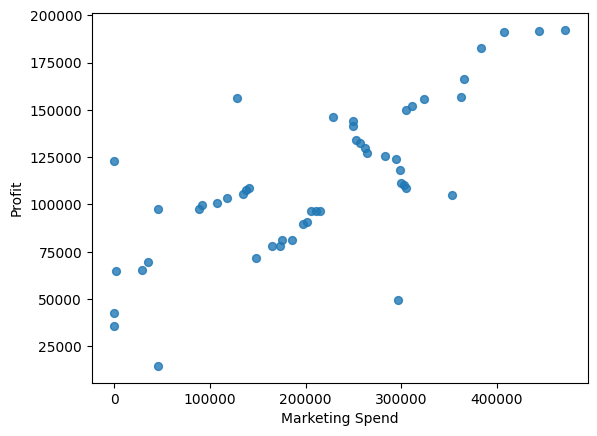

In [ ]:
from matplotlib import pyplot as plt
startup.plot(kind='scatter', x='Marketing Spend', y='Profit', s=32, alpha=.8)

## 2 Check Data

In [ ]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.715600,121344.739600,211025.197800,112012.739200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.100000,51283.240000,0.100000,14681.500000
25%,39936.470000,103730.975000,129300.232500,90139.002500
50%,73051.180000,122699.895000,212716.340000,107978.290000
75%,101602.900000,144842.280000,299469.185000,139766.077500
max,165349.300000,182645.660000,471784.200000,192261.930000


In [ ]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## 3 Preprocessing :
 - 1) one-hot encoding (cf. dummy variable)  
 - 2) train/test split

In [ ]:
# One-hot encode on state column and save the data as startup_encoded
import pandas as pd
startup_encoded = pd.get_dummies(startup, columns=['State'], prefix=['State_'])


In [ ]:
startup_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   R&D Spend          50 non-null     float64
 1   Administration     50 non-null     float64
 2   Marketing Spend    50 non-null     float64
 3   Profit             50 non-null     float64
 4   State__California  50 non-null     uint8  
 5   State__Florida     50 non-null     uint8  
 6   State__New York    50 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [ ]:
startup_encoded.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State__California', 'State__Florida', 'State__New York'],
      dtype='object')

In [ ]:
startup_encoded.columns !='Profit'

array([ True,  True,  True, False,  True,  True,  True])

In [ ]:
X=startup_encoded.loc[:, startup_encoded.columns!='Profit']
y=startup_encoded['Profit']

In [ ]:
X.head(2)

,R&D Spend,Administration,Marketing Spend,State__California,State__Florida,State__New York
0,165349.3,136897.90,471784.20,0,0,1
1,162597.8,151377.69,443898.63,1,0,0


In [ ]:
y.head(2)

0    192261.93
1    191792.16
Name: Profit, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## 4 Modeling

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

Note: In this example, we took only machine learning approach aiming for predictive performance.
For interpretability and coefficient estimation in linear models, we must omit one dummy to avoid multicorelinarity;
For predictive performance in models, including all dummies, as we do here, might be acceptable.

## 5 Prediction

In [ ]:
pred = model.predict(X_test)
pred

array([103015.30159796, 132582.37760816, 132447.83845174,  71976.19851258,
       178537.58221055, 116161.34230165,  67851.79209676,  98791.83374687,
       113969.53533012, 167921.1656955 ])

## 6 Evaluating the model

In [ ]:
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})

In [ ]:
comparison

,actual,pred
28,103282.48,103015.301598
11,144259.50,132582.377608
10,146122.05,132447.838452
41,77798.93,71976.198513
2,191050.49,178537.582211
27,105008.41,116161.342302
38,81229.16,67851.792097
31,97483.66,98791.833747
22,110352.35,113969.535330
4,166188.04,167921.165696


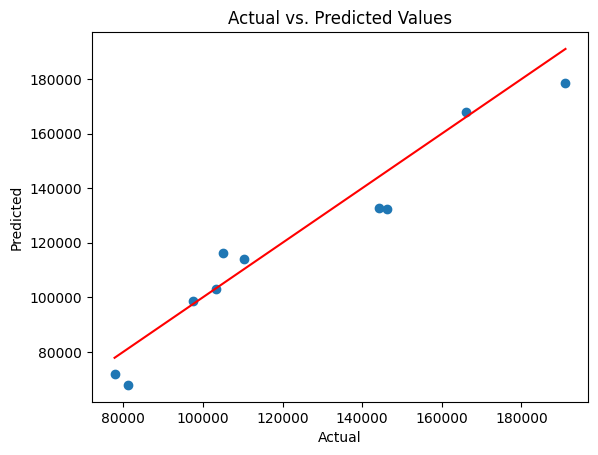

In [ ]:
# Compare actual v. predicted with line vs. scatter comparsion

# Plot the actual and predicted values
plt.scatter(y_test, pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Values")

# Add a line for the perfect fit
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
mean_squared_error(y_test, pred, squared = True)

83502864.03257737

In [ ]:
root_mean_squared_error= mean_squared_error(y_test, pred) ** 0.5
root_mean_squared_error

9137.990152794944

In [ ]:
model.score(X_train, y_train)

0.9501847627493607

In [ ]:
model.score(X_test, y_test)

0.9347068473282425

---